Reading the data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
Gold_data=pd.read_csv('D:/ivy/datasets/gold_data.csv')
Gold_data.head()

,Date,USD
0,1978-12-29,226.0
1,1979-01-01,226.0
2,1979-01-02,226.8
3,1979-01-03,218.6
4,1979-01-04,223.2


Looking at the data summary


In [4]:
Gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11886 entries, 0 to 11885
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11886 non-null  object 
 1   USD     11886 non-null  float64
dtypes: float64(1), object(1)
memory usage: 185.8+ KB


In [5]:
Gold_data.nunique()

Date    11886
USD      5806
dtype: int64

Feature Engineering in data

In [9]:
Gold_data['Timestamp']= pd.to_datetime(Gold_data['Date'])
Gold_data['Month']=Gold_data['Timestamp'].dt.month
Gold_data['Year']=Gold_data['Timestamp'].dt.year

In [15]:
Gold_data=Gold_data.drop(['Timestamp', 'Date'], axis=1)

In [16]:
Gold_data.drop_duplicates()

,USD,Month,Year
0,226.0,12,1978
1,226.0,1,1979
2,226.8,1,1979
3,218.6,1,1979
4,223.2,1,1979
...,...,...,...
11881,2421.3,7,2024
11882,2443.2,7,2024
11883,2480.3,7,2024
11884,2463.8,7,2024


In [35]:
Gold_data.nunique()

USD      5806
Month      12
Year       46
dtype: int64

In [20]:
print("Unique Values in Year Column: ", Gold_data['Year'].sort_values().unique())
print("Unique Values in Month Column: ", Gold_data['Month'].sort_values().unique())

Unique Values in Year Column:  [1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024]
Unique Values in Month Column:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [29]:
Gold_data.isnull().sum()

USD      0
Month    0
Year     0
dtype: int64

In [30]:
Gold_data=Gold_data[Gold_data['Year']!=1978]

Gold price in each month

In [39]:
a=pd.crosstab(columns=Gold_data['Month'],
            index=Gold_data['Year'],
            values=Gold_data['USD'],
            aggfunc='mean')
a

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1979,227.234783,245.690000,242.063636,238.685714,257.800000,279.085714,294.763636,301.447826,355.130000,391.660870,392.013636,461.238095
1980,668.213043,665.333333,553.595238,514.545455,513.659091,600.723810,644.295652,627.742857,673.640909,661.160870,623.475000,595.700000
1981,560.350000,499.775000,498.781818,494.609091,479.761905,460.777273,408.965217,410.880952,443.763636,437.772727,413.390476,408.300000
1982,384.780952,374.160000,330.273913,350.463636,334.738095,315.009091,338.995455,366.695455,437.331818,422.166667,414.931818,445.060870
1983,480.138095,491.220000,419.713043,431.180952,437.609091,412.859091,422.742857,416.291304,411.831818,393.595238,381.681818,386.804545
1984,371.440909,385.952381,394.295455,381.714286,377.686957,377.680952,347.490909,347.800000,341.120000,340.186957,341.190909,318.423810
1985,303.052174,299.125000,303.966667,324.527273,316.152174,316.510000,317.247826,330.036364,323.376190,325.865217,325.309524,322.395455
1986,344.578261,338.905000,345.557143,340.463636,342.300000,342.742857,348.356522,377.066667,417.740909,423.517391,397.565000,390.617391
1987,407.390909,401.135000,408.931818,438.313636,460.385714,449.613636,450.539130,460.785714,460.363636,465.372727,467.590476,485.534783


In [57]:
data=pd.crosstab(columns=Gold_data['Year'],
            index=Gold_data['Month'],
            values=Gold_data['USD'],
            aggfunc='mean').melt()['value']

In [60]:
data.tail(12)

540    2036.000000
541    2023.261905
542    2160.719048
543    2330.009091
544    2349.247826
545    2326.355000
546    2394.486667
547            NaN
548            NaN
549            NaN
550            NaN
551            NaN
Name: value, dtype: float64

In [ ]:
Visualizing the Gold price per month

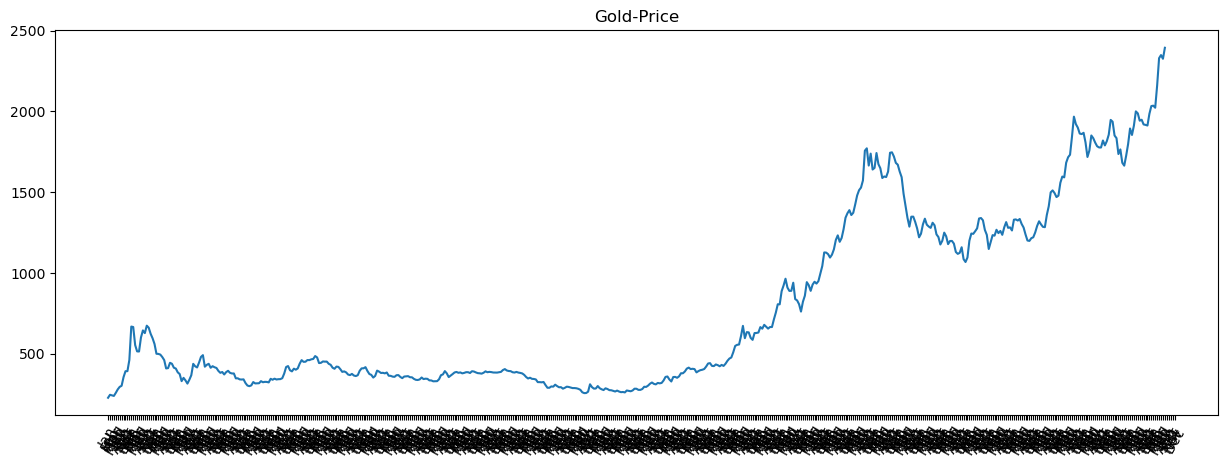

In [61]:
MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*46
%matplotlib inline
import matplotlib.pyplot as plt
data.plot(kind='line', figsize=(15,5), title='Gold-Price')

plotLabels=plt.xticks(np.arange(0,552,1),MonthNames, rotation=60)

Finding best hyperparameters for SARIMA model

In [62]:
# Creating the function to find best values of p,d,q for SARIMA
def FunctionTuneArima(inpData, p_values, d_values, q_values, 
                      seasonal_p_values, seasonal_d_values, seasonal_q_values,cycle):
    # Supressing warning messages
    import warnings
    warnings.filterwarnings(action='ignore')
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    # Fitting the model for each set of values passed
    
    # Creating an empty data frame to store
    Results=pd.DataFrame()
    
    # Trying the values
    for p_value in p_values:
        for d_value in d_values:
            for q_value in q_values:
                for seasonal_p_value in seasonal_p_values:
                    for seasonal_d_value in seasonal_d_values:
                        for seasonal_q_value in seasonal_q_values:
                            
                          
                                model = SARIMAX(inpData, 
                                    order=(p_value,d_value,q_value), 
                                    seasonal_order =(seasonal_p_value, 
                                                     seasonal_d_value,
                                                     seasonal_q_value,
                                                     cycle))
                                model_fit=model.fit(disp=False)
                                pred = model_fit.predict(0, len(inpData))
                                Acc=100- np.mean(abs(pred-inpData)/inpData*100)
                                
                                Results=pd.concat([Results,pd.DataFrame([[p_value,
                                                                   d_value,
                                                                   q_value,
                                                                   seasonal_p_value,
                                                                   seasonal_d_value,
                                                                   seasonal_q_value,
                                                                   Acc]],
                                                                   columns=["p","d","q",
                                                                           "seasonal_p",
                                                                           "seasonal_d",
                                                                           "seasonal_q",
                                                                           "Accuracy"
                                                                           ] )])

                            
    return(Results)

In [63]:
ResultsData=FunctionTuneArima(inpData=data,
                  p_values=[0,1], 
                  d_values=[0,1], 
                  q_values=[1,10],  
                  seasonal_p_values=[1,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0],
                  cycle=12
                 )

In [64]:
ResultsData.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,1,1,1,1,0,0,96.889132
0,1,1,1,2,0,0,96.878338
0,1,0,1,1,0,0,96.868134
0,0,1,1,1,0,0,96.867955
0,1,0,10,1,0,0,96.854743
0,1,0,1,2,0,0,96.854599
0,0,1,1,2,0,0,96.854578
0,0,1,10,1,0,0,96.854378
0,1,1,10,1,0,0,96.851946
0,1,0,10,2,0,0,96.846371


Creating the predictive model for Gold price

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data, order=(1,1,1), seasonal_order =(1,0,0,12))
                                                     
model_fit=model.fit(disp=False)
FutureMonths=12
forecast=model_fit.predict(start=0, end=(len(data))+FutureMonths)
print("Next Twelve Month Forecast:\n",forecast[-FutureMonths:])

Next Twelve Month Forecast:
 553    2411.433740
554    2420.763129
555    2432.340834
556    2433.643866
557    2432.085761
558    2436.734068
559    2437.761096
560    2437.238746
561    2437.443345
562    2437.682303
563    2437.949202
564    2437.942502
Name: predicted_mean, dtype: float64


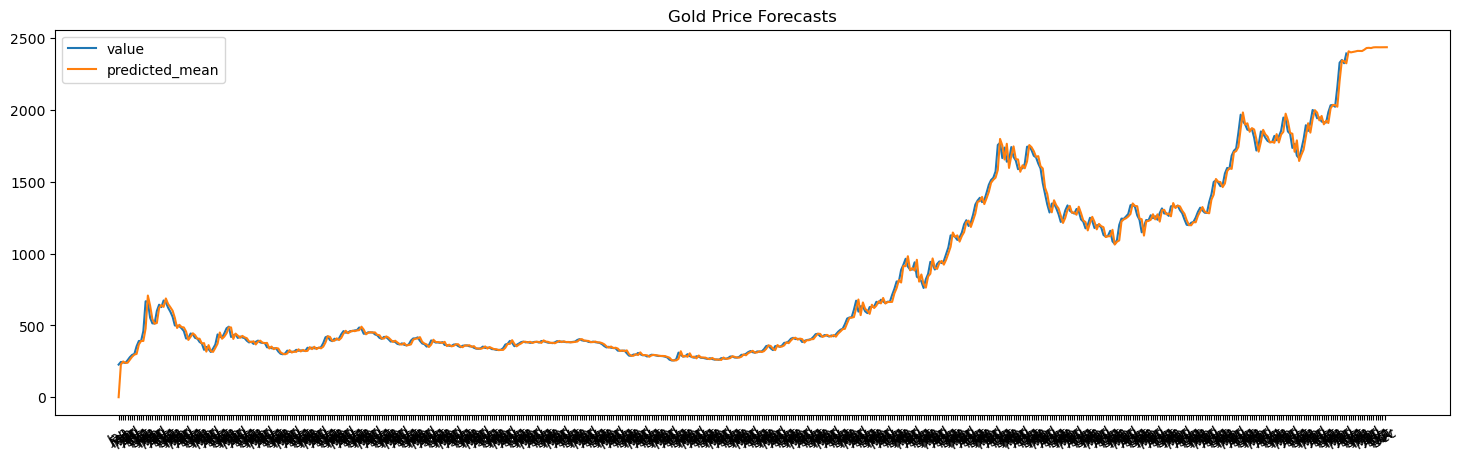

In [67]:
data.plot(figsize = (18, 5), legend = True, title='Gold Price Forecasts')
forecast.plot(legend = True, figsize=(18,5))
PlotMonthNames=MonthNames+MonthNames[0:FutureMonths]
plotLabels=plt.xticks(np.arange(0,len(PlotMonthNames),1),PlotMonthNames, rotation=30)

In [72]:
forecast.tail(30)

535    1959.141527
536    1900.985319
537    1925.460279
538    1910.024637
539    2011.708983
540    2035.884962
541    2035.093451
542    2023.546033
543    2201.741312
544    2345.089808
545    2340.183211
546    2325.999399
547    2409.521451
548    2401.873836
549    2404.869067
550    2408.371147
551    2412.281076
552    2412.183111
553    2411.433740
554    2420.763129
555    2432.340834
556    2433.643866
557    2432.085761
558    2436.734068
559    2437.761096
560    2437.238746
561    2437.443345
562    2437.682303
563    2437.949202
564    2437.942502
Name: predicted_mean, dtype: float64

In [71]:
data.tail(30)

522    1736.390476
523    1765.060870
524    1682.163636
525    1664.471429
526    1726.477273
527    1798.081818
528    1894.795455
529    1854.570000
530    1912.756522
531    2000.585000
532    1988.530435
533    1942.927273
534    1948.876190
535    1919.852174
536    1916.985714
537    1913.054545
538    1985.304545
539    2033.419048
540    2036.000000
541    2023.261905
542    2160.719048
543    2330.009091
544    2349.247826
545    2326.355000
546    2394.486667
547            NaN
548            NaN
549            NaN
550            NaN
551            NaN
Name: value, dtype: float64

In [70]:
MAPE=np.mean(abs(data-forecast)/data)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

#### Accuracy of model: 96.89 ####
